In [36]:
import numpy as np
from math import exp, sqrt
from matplotlib import pyplot as plt


In [37]:
# generate inital population
def generate_population(N , M):
    nucl = ['A', 'T', 'C', 'G']
    population = np.zeros((N, M), dtype = str)
    for i in range(N):
        for j in range(M):
            population[i][j] = nucl[np.random.randint(4)]
    return population
    

In [40]:
# find number of more than three consecutive repetitions of A's, T's, C's, G's in each key
def has_repetitions(choromosome):
    rep = False
    choromosome = choromosome[0][0]
    # print(len(choromosome[0][0]))
    for i in range(len(choromosome)):
        # print(choromosome[0][0][i])
        if i < len(choromosome) - 3:
            if choromosome[i] == choromosome[i+1] == choromosome[i+2] == choromosome[i+3]:
                rep = True
                break
    return rep

In [41]:
# find weak and strong individuals
def find_weak_strong(population):

    weak = []
    strong = []
    div =  2
    freq = len(population[0]) // 4 

    for i in range(len(population)):
        A = 0
        T = 0
        C = 0
        G = 0

        if has_repetitions(population[i]):
            weak.append(population[i])
            continue

        for j in range(len(population[i])):

            # count number of A's in each key
            if population[i][j] == 'A':
                A += 1
            # count number of T's in each key
            elif population[i][j] == 'T':
                T += 1
            # count number of C's in each key
            elif population[i][j] == 'C':
                C += 1
            # count number of G's in each key
            elif population[i][j] == 'G':
                G += 1
                
        if A > (freq + div) or A < (freq - div) or T > (freq + div) or T < (freq - div) or C > (freq + div) or C < (freq - div) or G > (freq + div) or G < (freq - div):
            # print('weak' , i ,'---->' , "A : ", A , "T : ", T , "C : ", C , "G : ", G)
            weak.append(population[i])
        else:
            strong.append(population[i])
        
        # print("A : ", A , "T : ", T , "C : ", C , "G : ", G)


    weak = np.array(weak)
    strong = np.array(strong)

    return weak

    

In [43]:
def fitness(choromosome , n):
    A = 0
    T = 0
    C = 0
    G = 0
    i = choromosome.shape[0] // 4
    for j in range(len(choromosome)):
        # count number of A's in each key
        if choromosome[j] == 'A':
            A += 1
        # count number of T's in each key
        elif choromosome[j] == 'T':
            T += 1
        # count number of C's in each key
        elif choromosome[j] == 'C':
            C += 1
        # count number of G's in each key
        elif choromosome[j] == 'G':
            G += 1
        
    sigma_A = sqrt(((i - A)**2)/n)
    sigma_T = sqrt(((i - T)**2)/n)
    sigma_C = sqrt(((i - C)**2)/n)
    sigma_G = sqrt(((i - G)**2)/n)
    lambda_1 = (sigma_A + sigma_T + sigma_C + sigma_G) / 4
    if has_repetitions(choromosome):
        lambda_2 = 1
    else:
        lambda_2 = 0

    fitness = 1 / (1 + exp(lambda_1 + lambda_2))

    return fitness



In [44]:
def sort_weak(weak):
    fitnesses = []
    for i in range(len(weak)):
        fitnesses.append(fitness(weak[i] , len(weak)))
    fitnesses = np.array(fitnesses)
    weak = weak[np.argsort(fitnesses)[::-1]]
    return weak

In [45]:
# crossover 

crossover_list = []

def crossover(weak , m ):
    num_crossover = 0
    n = m // 2
    new_pop = []
    weak = sort_weak(weak)
    for i in range(0, len(weak), 2):
        if i < len(weak) - 1:
            new_pop.append(np.concatenate((weak[i][:n] , weak[i+1][n:])))
            new_pop.append(np.concatenate((weak[i+1][:n] , weak[i][n:])))
            num_crossover += 1
        else:
            new_pop.append(weak[i])
    crossover_list.append(num_crossover)
    # print("number of crossover : " , num_crossover)
    return np.array(new_pop)

In [47]:
def mutation(child):
    number_of_mutations = 0
    a = 0
    t = 0
    c = 0
    g = 0
    i = child.shape[0] // 4
    for j in range(len(child)):
        # count number of A's in each key
        if child[j] == 'A':
            a += 1
        # count number of T's in each key
        elif child[j] == 'T':
            t += 1
        # count number of C's in each key
        elif child[j] == 'C':
            c += 1
        # count number of G's in each key
        elif child[j] == 'G':
            g += 1

    if a>= t and a >= c and a >= g:
        MAX = 'A'
    elif t>= a and t >= c and t >= g:
        MAX = 'T'
    elif c>= a and c >= t and c >= g:
        MAX = 'C'
    elif g>= a and g >= t and g >= c:
        MAX = 'G'

    if a<= t and a <= c and a <= g:
        MIN = 'A'
    elif t<= a and t <= c and t <= g:
        MIN = 'T'
    elif c<= a and c <= t and c <= g:
        MIN = 'C'
    elif g<= a and g <= t and g <= c:
        MIN = 'G'

    m = i - min(a,t,c,g)

    index = []

    for i in range(len(child)):
        if child[i] == MAX:
            index.append(i)
    # print(index)
    for i in range(m):
        child[index[np.random.randint(0,len(index))]] = MIN
        number_of_mutations += 1
        
    # print("number of mutations : " , number_of_mutations)

    return child , number_of_mutations

In [49]:
# mutate child
mutate_list = []
def mutate(child):
    number_of_mutations_all = 0
    new_pop = []
    for i in range(len(child)):
        new_child , number_of_mutations = mutation(child[i])
        new_pop.append(new_child)
        number_of_mutations_all += number_of_mutations
    mutate_list.append(number_of_mutations_all)
    # print("number of mutations : " , number_of_mutations_all)
    return np.array(new_pop)

In [56]:
def genetic_algorithm(population , n):

    weak = find_weak_strong(population)
    child = crossover(weak , n)
    new_pop = mutate(child)

    return new_pop

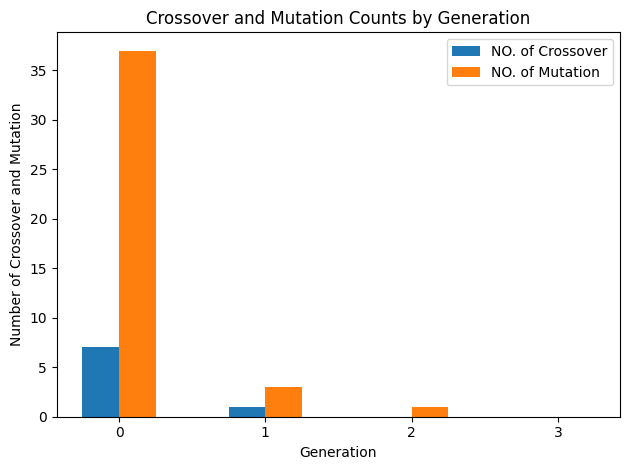

[7, 1, 0, 0]
[37, 3, 1, 0]


In [86]:
new_pop = generate_population(25, 25)
weak_key = []
crossover_list = []
mutate_list = []

for i in range(20):
    new_pop = genetic_algorithm(new_pop  , new_pop.shape[1])
    weak_key.append(new_pop.shape[0])
    if len(new_pop) == 0:
        break

# Plot the bars for crossover and mutation counts for each generation
x = np.arange(len(crossover_list))
width = 0.25  
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, crossover_list, width, label='NO. of Crossover')
rects2 = ax.bar(x + width/2, mutate_list, width, label='NO. of Mutation')

ax.set_xlabel('Generation')
ax.set_ylabel('Number of Crossover and Mutation')
ax.set_title('Crossover and Mutation Counts by Generation')
ax.set_xticks(x)
ax.legend()

fig.tight_layout()

plt.show()

print(crossover_list)
print(mutate_list)


In [149]:
new_pop = generate_population(25, 25)
weak_key = len(genetic_algorithm(new_pop , new_pop.shape[1]))

with open('chart_final.csv', 'a') as f:
        f.write('N = 25' + ' , ' + ' M = 25' + ' , ' + 'number of Weak Keys = '+str(weak_key) + '\n')

for i in range(25 , 26):
    for j in range(50 , 501,50):
        new_pop = generate_population(i, j)
        weak_key = len(genetic_algorithm(new_pop , new_pop.shape[1]))

        with open('chart_final.csv', 'a') as f:
            f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'number of Weak Keys = '+str(weak_key) + '\n')

for i in range(50 , 501 ,50):
    for j in range(50 , 501,50):
        new_pop = generate_population(i, j)
        weak_key = len(genetic_algorithm(new_pop , new_pop.shape[1]))

        with open('chart_final.csv', 'a') as f:
            f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'number of Weak Keys = '+str(weak_key) + '\n')

for i in range(50 , 501, 50):
    for j in range(25 , 26):
        new_pop = generate_population(i, j)
        weak_key = len(genetic_algorithm(new_pop , new_pop.shape[1]))

        with open('chart_final.csv', 'a') as f:
            f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'number of Weak Keys = '+str(weak_key) + '\n')

In [ ]:
new_pop = generate_population(25, 25)
for x in range(20):
    new_pop = genetic_algorithm(new_pop  , new_pop.shape[1])
    if len(new_pop) == 0:
        with open('chart.csv', 'a') as f:
           f.write('N = 25' + ' , ' + ' M = 25' + ' , ' + 'Number of Generation = '+str(x+1) + '\n')
        break


for i in range(25 , 26):
    for j in range(50 , 501,50):
        new_pop = generate_population(i, j)
        for x in range(20):
            new_pop = genetic_algorithm(new_pop  , new_pop.shape[1])
            if len(new_pop) == 0:
                with open('chart.csv', 'a') as f:
                    f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'Number of Generation = '+str(x+1) + '\n')
                break


for i in range(50 , 501 ,50):
    for j in range(50 , 501,50):
        new_pop = generate_population(i, j)
        for x in range(20):
            new_pop = genetic_algorithm(new_pop  , new_pop.shape[1])
            if len(new_pop) == 0:
                with open('chart.csv', 'a') as f:
                    f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'Number of Generation = '+str(x+1) + '\n')
                break

for i in range(50 , 501, 50):
    for j in range(25 , 26):
        new_pop = generate_population(i, j)
        for x in range(20):
            new_pop = genetic_algorithm(new_pop  , new_pop.shape[1])
            if len(new_pop) == 0:
                with open('chart.csv', 'a') as f:
                    f.write('N = ' + str(i) + ' , ' + ' M = ' + str(j) + ' , ' + 'Number of Generation = '+str(x+1) + '\n')
                break